In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

df = pd.read_csv('housing.csv')
df.shape

(168446, 18)

In [2]:
df['agency'] = df['agency'].fillna('Personal Listing')
df['agent'] = df['agent'].fillna('Personal Listing')

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df = df[(df['baths']>0) & (df['bedrooms']>0) & (df['Total_Area']>0) & (df['price'] >= 1000)]
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,Personal Listing,Personal Listing,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,Personal Listing,Personal Listing,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,Personal Listing,Personal Listing,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,Personal Listing,Personal Listing,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [5]:
df = df.drop(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'agency', 'agent'], axis=1)
df.head(3)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,1089.004
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,15246.056
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,2178.008


In [6]:
df['property_type'] = df['property_type'].replace(['Upper Portion', 'Lower Portion'], 'Flat')

In [55]:
df['listing_date'] = pd.to_datetime(df['date_added'])
df['listing_month'] = df['listing_date'].dt.month
df['listing_year'] = df['listing_date'].dt.year
mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
#df['listing_month'] = df['listing_month'].map(mapping)
df.head(3)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area,listing_date,listing_month,listing_year
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,1089.004,2019-02-04,2,2019
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,15246.056,2019-05-04,5,2019
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,2178.008,2019-07-17,7,2019


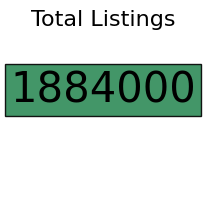

In [8]:
plt.figure(figsize=(2, 2))
plt.text(0.5, 0.5, f"{df.size}", fontsize=30, ha="center", va="bottom", bbox=dict(facecolor="seagreen", alpha=0.9))
plt.axis("off")
plt.title("Total Listings", fontsize=16)
plt.show()

In [57]:
listings_by_month = df.groupby('listing_month').size().reset_index(name='listings')
listings_by_month

,listing_month,listings
0,1,2707
1,2,4061
2,3,4530
3,4,6742
4,5,10190
5,6,37863
6,7,48816
7,8,1646
8,9,2215
9,10,2388


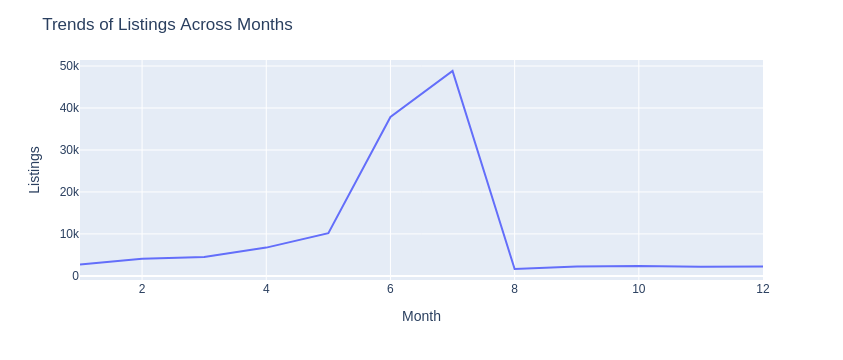

In [58]:
fig = px.line(listings_by_month, x='listing_month', y="listings")
fig.update_layout(title='Trends of Listings Across Months', xaxis_title='Month', yaxis_title='Listings')
fig.show()

In [11]:
sale = df.loc[df['purpose']=='For Sale',:]
rental = df.loc[df['purpose']=='For Rent',:]

In [12]:
listings = pd.Series([sale.size, rental.size])
listings_by_purpose = pd.DataFrame({'Purpose':['For Sale', 'For Rent'], 'Listings':listings})
listings_by_purpose

,Purpose,Listings
0,For Sale,1391205
1,For Rent,492795


In [13]:
fig = px.bar(listings_by_purpose, x='Purpose', y='Listings')
fig.update_layout(title='Listings by Purpose', width=700, height=600, bargap=0.4)
fig.show()

In [14]:
h_sale = sale.loc[sale['property_type']=='House',:]
f_sale = sale.loc[sale['property_type']=='Flat',:]
farm_sale = sale.loc[sale['property_type']=='Farm House',:]
p_sale = sale.loc[sale['property_type']=='Penthouse',:]

In [15]:
sale_listings =  pd.Series([h_sale.size, f_sale.size, farm_sale.size, p_sale.size])
sale_listings_by_property_type = pd.DataFrame({'Property Type':['House', 'Flat', 'Farm House', 'Penthouse'], 'Listings': sale_listings})
sale_listings_by_property_type

,Property Type,Listings
0,House,1012740
1,Flat,371955
2,Farm House,3090
3,Penthouse,3195


In [16]:
fig = px.bar(sale_listings_by_property_type, x='Property Type', y='Listings')
fig.update_layout(title='Listings by Property Type (For Sale)', width=700, height=600, bargap=0.4, yaxis_type='log')
fig.show()

In [17]:
h_rental = rental.loc[rental['property_type']=='House',:]
f_rental = rental.loc[rental['property_type']=='Flat',:]
room_rental = rental.loc[rental['property_type']=='Room',:]
farm_rental = rental.loc[rental['property_type']=='Farm House',:]
p_rental = rental.loc[rental['property_type']=='Penthouse',:]

In [18]:
rental_listings =  pd.Series([h_rental.size, f_rental.size, room_rental.size, farm_rental.size, p_rental.size])
rental_listings_by_property_type = pd.DataFrame({'Property Type':['House', 'Flat', 'Room', 'Farm House', 'Penthouse'], 'Listings': rental_listings})
rental_listings_by_property_type

,Property Type,Listings
0,House,168465
1,Flat,315840
2,Room,6840
3,Farm House,465
4,Penthouse,1185


In [19]:
fig = px.bar(rental_listings_by_property_type, x='Property Type', y='Listings')
fig.update_layout(title='Listings by Property Type (For Rent)', width=700, height=600, bargap=0.4, yaxis_type='log')
fig.show()

In [20]:
listings_by_city = df['city'].value_counts().reset_index(name='listings')
listings_by_city 

,city,listings
0,Karachi,47498
1,Lahore,34096
2,Islamabad,27889
3,Rawalpindi,13586
4,Faisalabad,2531


In [21]:
fig = px.bar(listings_by_city, x='city', y='listings')
fig.update_layout(title='Listings by City', xaxis_title='City',yaxis_title='Listings',width=700, height=600, bargap=0.3)
fig.show()

In [22]:
property_type_by_city = df.groupby(['city','property_type']).size().unstack()

In [23]:
fig = px.imshow(property_type_by_city)
fig.update_layout(title='Trend of Property Type Across Cities',height=600, width=700, xaxis_title=None, yaxis_title=None, template='seaborn')
fig.show()

In [24]:
lahore = df.loc[df['city']=='Lahore', :].groupby(['location']).size().reset_index(name='listings')
top_10_lahore = lahore.sort_values(by='listings', ascending=False).head(10)

In [25]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_lahore['location'], x=top_10_lahore['listings'],
                         mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_lahore['location'], x=top_10_lahore['listings'],
                     orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Lahore', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [26]:
karachi = df.loc[df['city']=='Karachi', :].groupby(['location']).size().reset_index(name='listings')
top_10_karachi = karachi.sort_values(by='listings', ascending=False).head(10)

In [27]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_karachi['location'], x=top_10_karachi['listings'],
                         mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_karachi['location'], x=top_10_karachi['listings'],
                     orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Karachi', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [28]:
isb = df.loc[df['city']=='Islamabad', :].groupby(['location']).size().reset_index(name='listings')
top_10_isb = isb.sort_values(by='listings', ascending=False).head(10)

In [29]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_isb['location'], x=top_10_isb['listings'],
                         mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_isb['location'], x=top_10_isb['listings'],
                     orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Islamabad', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [30]:
rwp = df.loc[df['city']=='Rawalpindi', :].groupby(['location']).size().reset_index(name='listings')
top_10_rwp = rwp.sort_values(by='listings', ascending=False).head(10)

In [31]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_rwp['location'], x=top_10_rwp['listings'],
                         mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_rwp['location'], x=top_10_rwp['listings'],
                     orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Rawalpindi', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [32]:
fsb = df.loc[df['city']=='Faisalabad', :].groupby(['location']).size().reset_index(name='listings')
top_10_fsb = fsb.sort_values(by='listings', ascending=False).head(10)

In [33]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=top_10_fsb['location'], x=top_10_fsb['listings'],
                         mode='markers', name='Value'))
fig.add_trace(go.Bar(y=top_10_fsb['location'], x=top_10_fsb['listings'],
                     orientation='h', name='Bar', marker=dict(opacity=0.6),width=0.3))
fig.update_layout(title='Top 10 Most Popular Locations in Faisalabad', xaxis_title='Listings', yaxis_title='Locations', height=500)
fig.show()

In [34]:
#fig = px.scatter_geo(df, lat='latitude', lon='longitude', hover_name='city', title='Property Locations with Latitude and Longitude',center={'lat': 30, 'lon': 70})
#fig.update_layout(geo_scope='asia',height=600,width=800)

In [35]:
# i = sale[(sale['bedrooms']==13) & (sale['property_type']=='House')].index
# sale.drop(i, axis=0, inplace=True) #outlier

In [78]:
df.drop(146669, inplace=True, axis=0)
df.drop(126146, inplace=True)
df.drop(97553, inplace=True)
df.drop(145363, inplace=True)

In [37]:
#df.sort_values(by='Total_Area', ascending=False

In [38]:
sale_price_vs_beds = sale.groupby(['property_type', 'bedrooms'])['price'].mean().reset_index()

fig = px.scatter(
    sale_price_vs_beds,
    x='bedrooms',
    y='price',
    color='property_type',
    #markers=True,
    title='Average Property Price (For Sale) by Number of Beds and Property Type',
    labels={'beds': 'Number of Beds', 'price': 'Average Price'}
)

fig.update_layout(
    xaxis_title='Number of Beds',
    yaxis_title='Average Price',
    legend_title='Property Type', 
    height = 700,
    width = 800
)

fig.show()

In [39]:
rental_price_vs_beds = rental.groupby(['property_type', 'bedrooms'])['price'].mean().reset_index()

fig = px.scatter(
    rental_price_vs_beds,
    x='bedrooms',
    y='price',
    color='property_type',
   # markers=True,
    title='Average Property Price (For Rent) by Number of Beds and Property Type',
    labels={'beds': 'Number of Beds', 'price': 'Average Price'}
)

fig.update_layout(
    xaxis_title='Number of Beds',
    yaxis_title='Average Price',
    legend_title='Property Type', 
    height = 700,
    width = 800
)

fig.show()

In [40]:
city_wise_sale_price = h_sale.groupby(['city'])['price'].mean().reset_index()
city_wise_sale_price

,city,price
0,Faisalabad,1.301923e+07
1,Islamabad,3.574854e+07
2,Karachi,3.951289e+07
3,Lahore,2.555127e+07
4,Rawalpindi,1.672226e+07


In [41]:
h_sale_by_city = h_sale.groupby(['city', 'bedrooms'])['price'].mean().reset_index()

fig = px.line(
    h_sale_by_city,
    x='bedrooms',
    y='price',
    color='city',
    markers=True,
    title='Average House Sale Price by City',
    labels={'beds': 'Number of Beds', 'price': 'Average Price'}
)

fig.update_layout(
    xaxis_title='Number of Beds',
    yaxis_title='Average Price',
    legend_title='City', 
    height = 700,
    width = 800
)

fig.show()

In [42]:
h_rental_by_city = h_rental.groupby(['city', 'bedrooms'])['price'].mean().reset_index()

fig = px.line(
    h_rental_by_city,
    x='bedrooms',
    y='price',
    color='city',
    markers=True,
    title='Average House Rent Price by City',
    labels={'beds': 'Number of Beds', 'price': 'Average Price'}
)

fig.update_layout(
    xaxis_title='Number of Beds',
    yaxis_title='Average Price',
    legend_title='City', 
    height = 700,
    width = 800
)

fig.show()

In [43]:
f_sale_by_city = f_sale.groupby(['city', 'bedrooms'])['price'].mean().reset_index()

fig = px.line(
    h_rental_by_city,
    x='bedrooms',
    y='price',
    color='city',
    markers=True,
    title='Average House Rent by City',
    labels={'beds': 'Number of Beds', 'price': 'Average Price'}
)

fig.update_layout(
    xaxis_title='Number of Beds',
    yaxis_title='Average Price',
    legend_title='City', 
    height = 700,
    width = 800
)

fig.show()

In [44]:
f_rental_by_city = f_rental.groupby(['city', 'bedrooms'])['price'].mean().reset_index()

fig = px.line(
    f_rental_by_city,
    x='bedrooms',
    y='price',
    color='city',
    markers=True,
    title='Average Flat Rent by City',
    labels={'beds': 'Number of Beds', 'price': 'Average Price'}
)

fig.update_layout(
    xaxis_title='Number of Beds',
    yaxis_title='Average Price',
    legend_title='City', 
    height = 700,
    width = 800
)

fig.show()

In [90]:
df.to_csv('cleaned.csv')

In [46]:
location_counts = sale['location'].value_counts()
locations_to_keep = location_counts[location_counts > 1].index
sale = sale[sale['location'].isin(locations_to_keep)]

In [47]:
avg = sale.groupby(['location', 'city'])['price'].mean().reset_index(name='average price')
avg

,location,city,average price
0,204 Chak Road,Faisalabad,1.162857e+07
1,7th Avenue,Islamabad,1.076667e+08
2,9th Avenue,Islamabad,2.450000e+07
3,AGHOSH,Islamabad,3.000000e+07
4,APP Employees Co-operative Housing Society,Karachi,3.900000e+07
...,...,...,...
1225,Zia Colony,Faisalabad,3.000000e+07
1226,Zone 5,Islamabad,1.850000e+07
1227,Zubaida Park,Lahore,1.505556e+07
1228,Zulfiqar Colony,Faisalabad,5.150000e+06


In [48]:
g = df.loc[df['location']=='G-6',:]
g['city'].unique()

array(['Islamabad'], dtype=object)

In [49]:
df['listing_year'].unique()

array([2019, 2018], dtype=int32)

In [60]:
rent = df.loc[df['purpose']=='For Sale', :]

month_rent = rent.groupby('listing_month')['price'].mean().reset_index(name='average_rent')
month_rent

,listing_month,average_rent
0,1,2.002484e+07
1,2,2.416717e+07
2,3,2.610959e+07
3,4,2.753390e+07
4,5,2.507917e+07
5,6,2.737641e+07
6,7,2.281783e+07
7,8,2.008742e+07
8,9,1.943423e+07
9,10,1.650363e+07


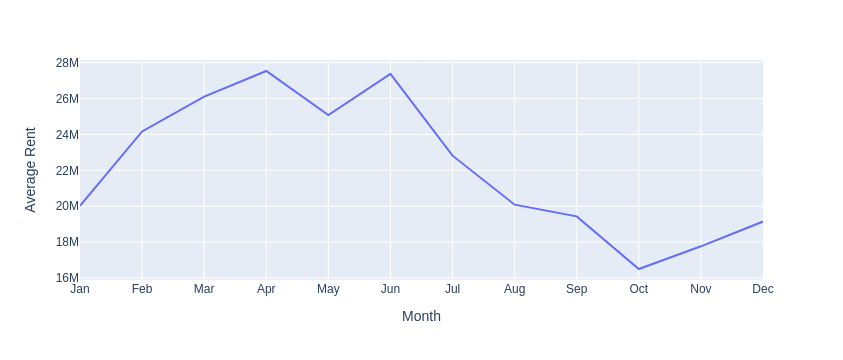

In [65]:
fig = px.line(month_rent, x='listing_month', y="average_rent")
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Rent',
    xaxis=dict(
        tickmode='array',
        tickvals=month_rent['listing_month'],
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # Custom labels
    )
)
fig.show()

In [69]:
y_2019 = df.loc[df['listing_year']==2018]

In [70]:
y_2019['listing_month'].unique()

array([10, 11, 12,  8,  9], dtype=int32)

In [71]:
df['Total_Area']

0          1089.004
1         15246.056
2          2178.008
3         10890.000
4          2178.008
            ...    
168436     2178.008
168437     1361.255
168438     2178.008
168439     3811.514
168445    25591.594
Name: Total_Area, Length: 125600, dtype: float64

In [72]:
df['area'] = round(df['Total_Area'] / 272, 0)


In [73]:
df.sort_values(by='area', ascending=False).head(20)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area,listing_date,listing_month,listing_year,area
146669,Flat,4000000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,2,For Sale,2,7/11/2019,93773790.0,2019-07-11,7,2019,344757.0
126146,House,35000000,Sabzazar Scheme,Lahore,Punjab,31.523459,74.265332,3,For Sale,3,7/3/2019,24502500.0,2019-07-03,7,2019,90083.0
97553,House,42500000,Askari,Lahore,Punjab,31.536408,74.416038,4,For Sale,4,6/26/2019,24230250.0,2019-06-26,6,2019,89082.0
145363,House,22000000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.531952,73.115211,7,For Sale,5,7/11/2019,12251250.0,2019-07-11,7,2019,45041.0
149501,Flat,15000000,Gulshan-e-Khudadad,Islamabad,Islamabad Capital,33.626837,72.982730,3,For Sale,3,7/12/2019,6267195.0,2019-07-12,7,2019,23041.0
161371,House,300000,F-7,Islamabad,Islamabad Capital,33.720556,73.064990,5,For Rent,4,7/16/2019,5445000.0,2019-07-16,7,2019,20018.0
165150,Flat,16000,Gulraiz Housing Scheme,Rawalpindi,Punjab,33.562800,73.107144,2,For Rent,2,7/17/2019,4356000.0,2019-07-17,7,2019,16015.0
126842,Flat,13000,Airport Housing Society,Rawalpindi,Punjab,33.590885,73.133533,1,For Rent,1,7/3/2019,3539250.0,2019-07-03,7,2019,13012.0
62447,House,4800000,Adiala Road,Rawalpindi,Punjab,33.523393,73.047551,2,For Sale,2,5/5/2019,3403125.0,2019-05-05,5,2019,12511.0
131914,House,6800000,Misryal Road,Rawalpindi,Punjab,33.600512,72.998031,3,For Sale,2,7/4/2019,3403125.0,2019-07-04,7,2019,12511.0


In [74]:
valid_area = df[df['area'] < 10000]

In [76]:
valid_area.sort_values(by='area')

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area,listing_date,listing_month,listing_year,area
155561,House,2600000,Tajpura,Lahore,Punjab,31.557474,74.401431,3,For Sale,3,7/16/2019,272.251,2019-07-16,7,2019,1.0
155562,House,2300000,Tajpura,Lahore,Punjab,31.557474,74.401431,2,For Sale,2,7/16/2019,272.251,2019-07-16,7,2019,1.0
155691,Flat,3200000,Gulberg,Islamabad,Islamabad Capital,33.598750,73.153968,1,For Sale,1,7/15/2019,272.251,2019-07-15,7,2019,1.0
156446,Flat,50000,North Nazimabad,Karachi,Sindh,24.935635,67.051020,3,For Rent,3,7/15/2019,272.251,2019-07-15,7,2019,1.0
16494,Room,16000,F-11,Islamabad,Islamabad Capital,33.689282,72.988958,1,For Rent,1,10/7/2018,272.251,2018-10-07,10,2018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143246,House,3350000,Al-Kabir Town,Lahore,Punjab,31.329958,74.215204,1,For Sale,1,7/10/2019,1769625.000,2019-07-10,7,2019,6506.0
151186,House,9000000,Johar Town,Lahore,Punjab,31.474389,74.269123,4,For Sale,4,7/13/2019,2139885.000,2019-07-13,7,2019,7867.0
143257,House,4750000,Al-Kabir Town,Lahore,Punjab,31.329958,74.215204,2,For Sale,2,7/10/2019,2586375.000,2019-07-10,7,2019,9509.0
138050,Flat,600000,Al-Kabir Town,Lahore,Punjab,31.364343,74.213113,2,For Sale,2,7/10/2019,2586375.000,2019-07-10,7,2019,9509.0


In [88]:
df[df['bedrooms']==12]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area,listing_date,listing_month,listing_year,area
99,House,31500000,Westridge,Rawalpindi,Punjab,33.607829,73.021817,10,For Sale,12,7/4/2019,65340.0,2019-07-04,7,2019,240.0
9094,House,550000000,F-6,Islamabad,Islamabad Capital,33.731335,73.068473,10,For Sale,12,5/5/2019,27225.0,2019-05-05,5,2019,100.0
15799,House,51500000,Bhara kahu,Islamabad,Islamabad Capital,33.737402,73.179159,10,For Sale,12,9/7/2018,76230.0,2018-09-07,9,2018,280.0
18959,House,150000000,F-11,Islamabad,Islamabad Capital,33.683532,72.990410,10,For Sale,12,6/12/2019,87120.0,2019-06-12,6,2019,320.0
62311,House,500000,Jamshed Town,Karachi,Sindh,24.864595,67.066126,6,For Rent,12,5/18/2019,10890.0,2019-05-18,5,2019,40.0


In [89]:
df.drop(62311, inplace=True)

In [93]:
df['area'].mean()

np.float64(39.2651400544612)